# Analyzing the NYC Subway Dataset

## Overview

This project consists of two parts. In Part 1 of the project, you should have completed the questions in Problem Sets 2, 3, 4, and 5 in the Introduction to Data Science course.

This document addresses part 2 of the project. Please use this document as a template and answer the following questions to explain your reasoning and conclusion behind your work in the problem sets. You will attach a document with your answers to these questions as part of your final project submission.

## Section 0 - References

- http://matplotlib.org/
- http://pandas.pydata.org/
    - Book: Python for Data Analysis (Wes McKinney)
- http://stanford.edu/~mwaskom/software/seaborn/
- http://ipython.org/
    - http://nbviewer.ipython.org/github/yenlung/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb
- http://www.scipy.org/
    - http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html
    - http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.mannwhitneyu.html
- http://pyvideo.org/
    - http://pyvideo.org/video/3395/pandas-from-the-ground-up
    - http://pyvideo.org/speaker/1274/benjamin-root
- https://www.python.org/
    - https://docs.python.org/2/library/random.html?highlight=shuffle#random.shuffle

In [1]:
%matplotlib inline

from random import shuffle
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt, ticker as tkr
from IPython.html.widgets import interact
from IPython.core.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns; sns.set_context('poster')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Format Pandas DataFrame
css = open('styles/table.css').read() + open('styles/notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Functions to format y-axis and x-axis numbers
def func(axis, pos):
    s = '{:2,d}'.format(int(axis))
    return s
 
axis_format = tkr.FuncFormatter(func)

In [4]:
# Read the csv file and put it in a Pandas DataFrame
df = pd.read_csv('turnstile_weather_v2.csv', index_col='datetime', parse_dates=True)
df = df.drop(['DATEn', 'TIMEn', 'weekday'], axis=1)
df.head()

,UNIT,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,station,latitude,longitude,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
datetime,,,,,,,,,,,,,,,,,,,,,
2011-05-01 00:00:00,R003,4388333,2911002,0,0,0,6,CYPRESS HILLS,40.689945,-73.872564,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2011-05-01 04:00:00,R003,4388333,2911002,0,0,4,6,CYPRESS HILLS,40.689945,-73.872564,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2011-05-01 12:00:00,R003,4388333,2911002,0,0,12,6,CYPRESS HILLS,40.689945,-73.872564,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
2011-05-01 16:00:00,R003,4388333,2911002,0,0,16,6,CYPRESS HILLS,40.689945,-73.872564,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
2011-05-01 20:00:00,R003,4388333,2911002,0,0,20,6,CYPRESS HILLS,40.689945,-73.872564,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


## Section 1 - Statistical Test

##### 1.1 - Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

I have used the Mann-Whitney U Test and a two-sided test. The null hypothesis is that there is no difference between the two populations (rain vs no_rain averages for ENTRIESn_hourly), which would indicate that rain has no effect in ridership. The p-critical used was 5%.

##### 1.2 - Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

As per the Histogram of MTA Ridership below, neither rain or no_rain days are normally distributed, that is why I did not use the Welch's t-test, because it assumes that the populations are normally distributed and with equal variances.

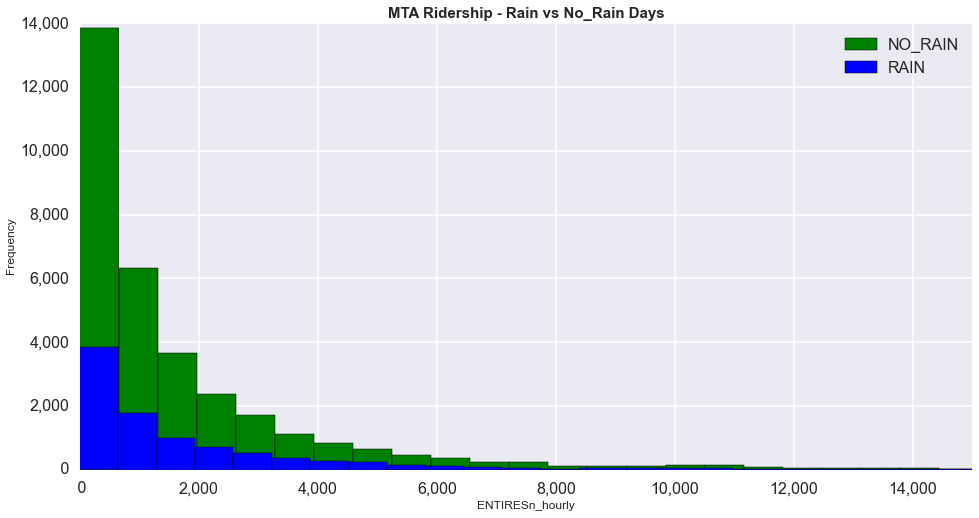

In [5]:
# Get the data
def get_data():
    rain = df[df['rain'] == 1]['ENTRIESn_hourly']
    no_rain = df[df['rain'] == 0]['ENTRIESn_hourly']
    return rain, no_rain

# Plot the histogram
def get_hist():
    rain, no_rain = get_data()
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(111)
    ax.hist(no_rain, bins=50, label = 'NO_RAIN', color='g')
    ax.hist(rain, bins=50, label = 'RAIN', color='b')
    ax.set_xlim(right=15000)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_xlabel('ENTIRESn_hourly', fontsize=12)
    ax.set_title("MTA Ridership - Rain vs No_Rain Days", fontweight='bold', fontsize=15)
    plt.gca().yaxis.set_major_formatter(axis_format)
    plt.gca().xaxis.set_major_formatter(axis_format)
    ax.legend(loc='best')
    plt.show()
    
get_hist()

##### 1.3 - What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

In [6]:
def mann_whitney():
    rain, no_rain = get_data()
    U, p = mannwhitneyu(rain, no_rain)
    print 'Average ridership for rain days: {0} \nAverage ridership for no_rain days: {1}'.format(rain.mean(), \
                                                                                no_rain.mean()); print' '
    print 'Mann-Whitney U Test: {0} \nTwo-tail p-value: {1:f}'.format(U, 2 * p)
    
mann_whitney()

Average ridership for rain days: 2028.19603547 
Average ridership for no_rain days: 1845.53943866
 
Mann-Whitney U Test: 153635120.5 
Two-tail p-value: 0.000005


##### 1.4 - What is the significance and interpretation of these results?

Because the p-value is much lower than the p-critical, I can reject the null hypothesis and say that ridership is influenced by rain.

## Section 2 - Linear Regression

#### 2.1 - What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:

I have used Gradient Descent in my analysis.


#### 2.2 - What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

I have used fog, rain, tempi, wspdi, meanprecipi as my model's features. Unfortunately, I could not use a dummy variable in my model, because I had problems with the Pandas' join method.

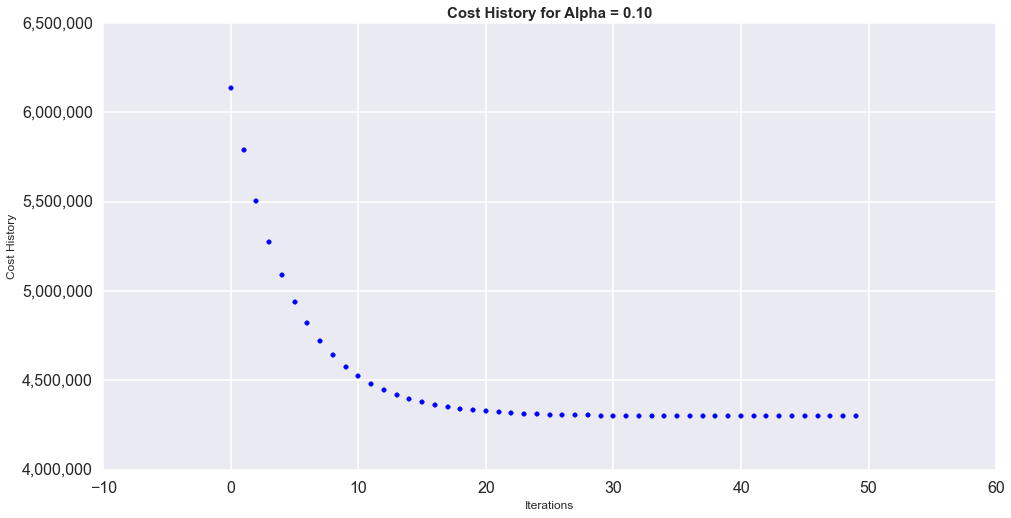

In [7]:
def normalize_features(df):
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma


def compute_cost(predicted_values, values, theta):
    m = len(values)
    sum_of_square_errors = np.square(predicted_values - values).sum()
    cost = sum_of_square_errors / (2 * m)

    return cost


def calculate_predicted_values(features, theta):
    predicted_values = np.dot(features, theta)

    return predicted_values


def calculate_theta(alpha, features, predicted_values, theta, values):
    m = len(values) * 1.0
    theta -= (alpha / m) * np.dot((predicted_values - values), features)

    return theta


def gradient_descent(features, values, theta, alpha, num_iterations):
    cost_history = []

    for i in range(0, num_iterations):
        predicted_values = calculate_predicted_values(features, theta)
        theta = calculate_theta(alpha, features, predicted_values, theta, values)
        cost = compute_cost(predicted_values, values, theta)
        cost_history.append(cost)

    return theta, pd.Series(cost_history)


def predictions(dataframe):
    features = dataframe[['fog', 'rain', 'tempi', 'wspdi', 'meanprecipi']]
    dummy_units = pd.get_dummies(dataframe['UNIT'], prefix='unit')
#     features = features.join(dummy_units)
    values = dataframe['ENTRIESn_hourly']
    m = len(values)
    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m)
    features_array = np.array(features)
    values_array = np.array(values)
    alpha = 0.1
    num_iterations = 50
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    

    plot = plot_cost_history(alpha, cost_history)
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions


def plot_cost_history(alpha, cost_history):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(111)
    ax.scatter(range(len(cost_history)), cost_history, color='b')
    ax.set_ylabel('Cost History', fontsize=12)
    ax.set_xlabel('Iterations', fontsize=12)
    ax.set_title('Cost History for Alpha = %.2f' % alpha, fontweight='bold', fontsize=15)
    plt.gca().yaxis.set_major_formatter(axis_format)
    plt.show()

my_pred = predictions(df)

#### 2.3 - Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model.

- Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
- Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  

#### 2.4 - What are the coefficients (or weights) of the non-dummy features in your linear regression model?

#### 2.5 - What is your model’s R2 (coefficients of determination) value?

In [8]:
def r_squared(df, predictions):
    r_squared = 1 - np.sum((np.square(df['ENTRIESn_hourly'] - predictions))) / \
                np.sum(np.square(df['ENTRIESn_hourly'] - np.mean(df['ENTRIESn_hourly'])))
    
    return r_squared
    
r_squared(df, my_pred)

0.013771843489307933

#### 2.6 - What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?

The R squared for the GD is very low, which means I can not explain much about of the data variability with the model and the features I have chosen.

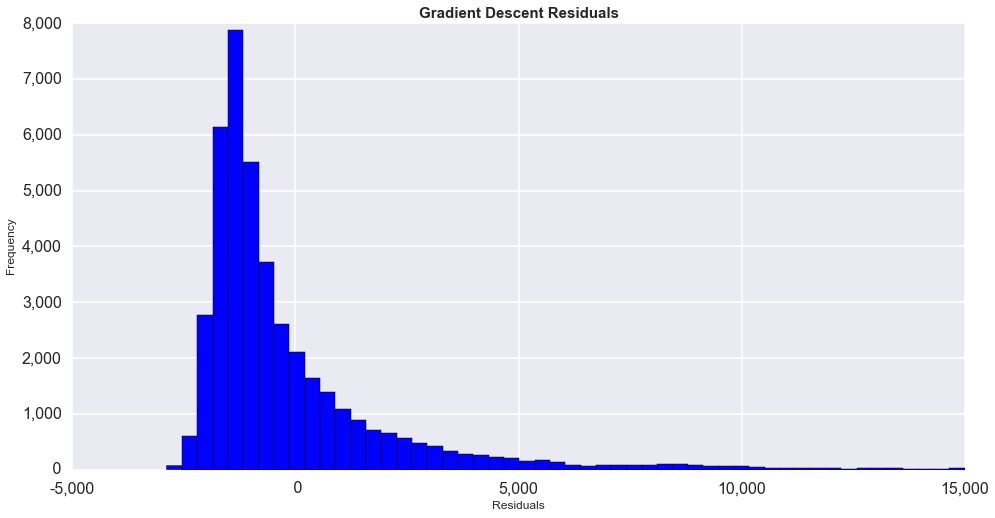

In [9]:
def plot_residuals(df, predictions):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(111)
    ax.hist((df['ENTRIESn_hourly'] - predictions), bins=100, color='b')
    ax.set_xlim(left=-5000, right=15000)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_xlabel('Residuals', fontsize=12)
    ax.set_title('Gradient Descent Residuals', fontweight='bold', fontsize=15)
    plt.gca().xaxis.set_major_formatter(axis_format)
    plt.gca().yaxis.set_major_formatter(axis_format)
    plt.show()

plot_residuals(df, my_pred)

## Section 3 - Visualization

Please include two visualizations that show the relationships between two or more variables in the NYC subway data. Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.

#### 3.1 - One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.

- You can combine the two histograms in a single plot or you can use two separate plots.

- If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.

- For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval.

- Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.

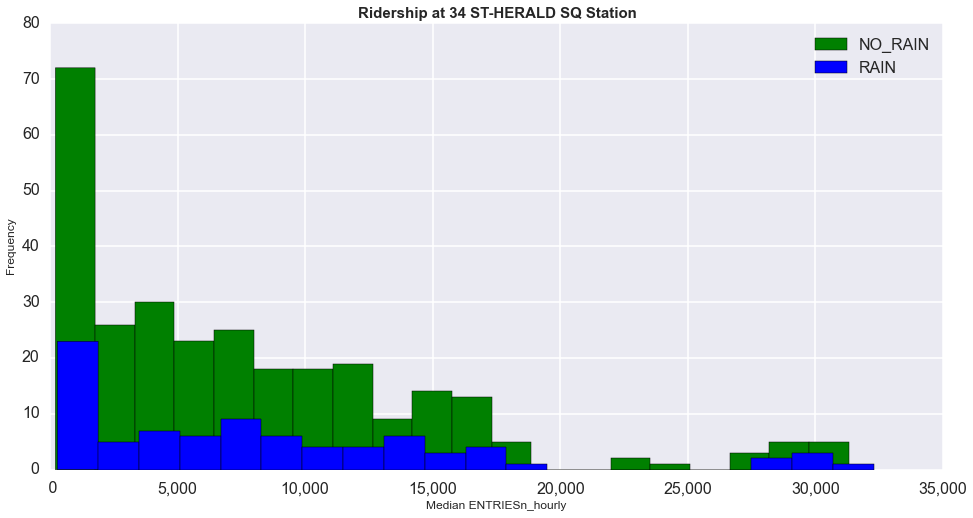

In [10]:
# Find the top 5 stations, calculated as the median of the 5 largest ENTRIESn_hourly
station_group = df.groupby(['station'], as_index=False)
ordered = station_group['station', 'ENTRIESn_hourly'].median().sort('ENTRIESn_hourly')
top_stations = list(ordered.tail()['station'])

# Get the data
def get_station_data(station_name):
    station_rain = df[(df["station"] == station_name) & (df["rain"] == 1)]["ENTRIESn_hourly"]
    station_no_rain = df[(df["station"] == station_name) & (df["rain"] == 0)]["ENTRIESn_hourly"]
    return station_rain, station_no_rain

# Create a histogram chart comparing ridership on rain vs no_rain days
def get_station_hist(station_name):
    station_rain, station_no_rain = get_station_data(station_name)
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(111)
    ax.hist(station_no_rain, bins=20, label = 'NO_RAIN', color = 'g')
    ax.hist(station_rain, bins=20, label = 'RAIN', color = 'b')
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_xlabel('Median ENTRIESn_hourly', fontsize=12)
    ax.set_title('Ridership at ' + station_name + ' Station', fontweight='bold', fontsize=15)
    plt.gca().xaxis.set_major_formatter(axis_format)
    ax.legend(loc='best')
    plt.show()

# Interact the chart
i1 = interact(get_station_hist, station_name=top_stations)

#### 3.2 - One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:

- Ridership by time-of-day

- Ridership by day-of-week

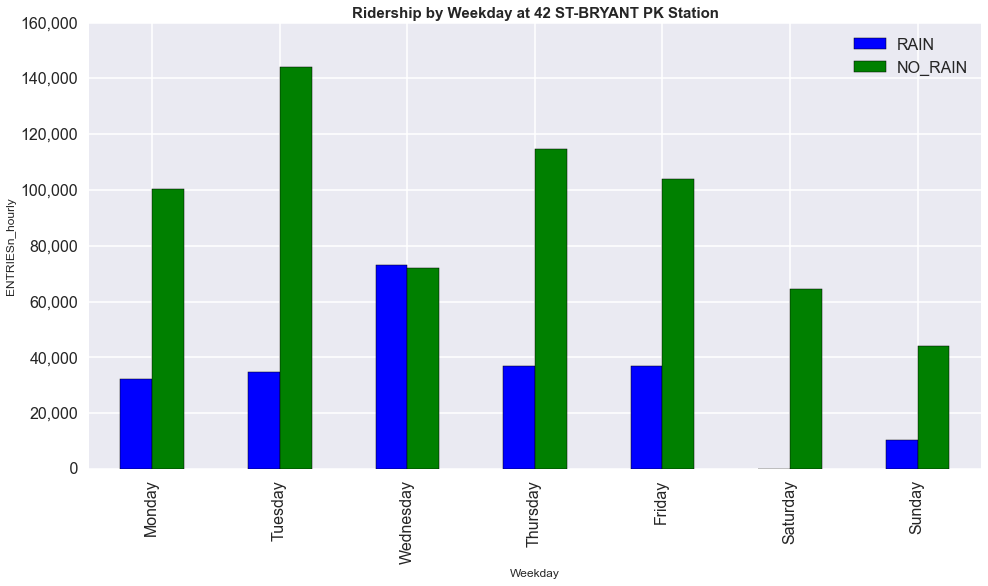

In [11]:
# Select 20 stations randomly
station_list = list(df.station.unique())
shuffle(station_list)
rand20_stations = station_list[0:20]

# Get the data
def get_rain_data(station_name):
    rain = df[(df["station"] == station_name) & (df["rain"] == 1)]
    rain_counts = rain.groupby('day_week')['ENTRIESn_hourly'].sum()
    
    no_rain = df[(df["station"] == station_name) & (df["rain"] == 0)]
    no_rain_counts = no_rain.groupby('day_week')['ENTRIESn_hourly'].sum()

    return rain_counts, no_rain_counts

# Create a bar chart comparing ridership on rain vs no_rain days by weekday
def get_rain_bar(station_name):
    rain_counts, no_rain_counts = get_rain_data(station_name)
    df = pd.merge(rain_counts.reset_index(0), no_rain_counts.reset_index(0), how='outer', left_on='day_week', 
                  right_on='day_week')
    df = df.sort('day_week')
    df = df.set_index('day_week')
    df = df.rename(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',
                          5: 'Saturday', 6: 'Sunday'}, columns={'ENTRIESn_hourly_x': 'RAIN', 
                                                                'ENTRIESn_hourly_y': 'NO_RAIN'})

    df.plot(kind='bar', figsize=plt.figaspect(0.5), color=['b', 'g'])
    plt.legend(loc='best')
    plt.ylabel('ENTRIESn_hourly', fontsize=12)
    plt.xlabel('Weekday', fontsize=12)
    plt.title('Ridership by Weekday at ' + station_name + ' Station', fontweight='bold', fontsize=15)
    plt.gca().yaxis.set_major_formatter(axis_format)
    plt.show()

# Interact the chart
i2 = interact(get_rain_bar, station_name=rand20_stations)

## Section 4 - Conclusion

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

#### 4.1 - From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?

Particularly given the results from the Mann-Whitney U test (very low p-value), we can say with a high level of certainty that more people ride the NYC subway when it is raining. It is important to note that simply looking at the means of both data sets is insufficient, due to variance. The Mann-Whitney U test is needed to quantitatively confirm that the two data sets are statistically different.

#### 4.2 - What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.

## Section 5 - Reflection

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

#### 5.1 - Please discuss potential shortcomings of the methods of your analysis, including: Dataset, Analysis, such as the linear regression model or statistical test.

I believe my model did not work well because I was not able to include a dummy variable to it.


#### 5.2 - (Optional) Do you have any other insight about the dataset that you would like to share with us?

